In [7]:
"This notebook is for studying the variation of Jacobian matrix during CPT.  The Jacobian matrix is calculated with Dynamo. "

'This notebook is for studying the variation of Jacobian matrix during CPT.  The Jacobian matrix is calculated with Dynamo. '

In [3]:
import scvelo as scv
import pandas as pd 
import numpy as np
from anndata import AnnData
import loompy
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.patches as mpatches
import pickle
import os

import leidenalg
from scipy import sparse
from IPython.display import SVG
from sklearn.linear_model import LinearRegression
from scipy import stats,signal
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scanpy
from scipy.sparse import issparse
from scvelo.preprocessing.utils import get_mean_var,materialize_as_ndarray
import dynamo as dyn
from dynamo.preprocessing import Preprocessor
from scipy.sparse import csr_matrix

In [6]:
"load data"

'load data'

In [ ]:
data_path='../data/'
result_path='result/'

adata=dyn.read_h5ad(result_path+'DG_dyn.h5ad')

In [8]:
"preprocess,calculate RNA velocities and compute transition matrix"

'preprocessing and calculating RNA velocities'

In [ ]:
dyn.pp.recipe_monocle(adata,keep_filtered_genes=False,keep_filtered_cells=True,num_dim=30)
dyn.tl.dynamics(adata,assumption_mRNA='auto')
dyn.tl.reduceDimension(adata)
dyn.pl.pca(adata, color='ClusterName',pointsize=0.1)

dyn.tl.cell_velocities(adata, method='fp', basis='pca',n_neighbors=30,correct_density=True)# 

In [9]:
"calculate vector field and Jacobian matrix within PCA basis"

'calculate vector field and Jacobian matrix within PCA basis'

In [ ]:
dyn.vf.VectorField(adata,basis='pca')

# dyn.pl.streamline_plot(adata,basis='pca',color='ClusterName')

dyn.vf.jacobian(adata)#,regulators=adata.var.index.values

In [12]:
J=adata.uns['jacobian_pca']['jacobian']

(30, 30, 3184)


In [10]:
"calcualte Jacobian matrix of each single cell in the gene space and perform statistics"

'calcualte Jacobian matrix of each single cell in the gene space and perform statistics'

In [14]:
J_ori_mean=[]
J_ori_std=[]
for i in range(J.shape[2]):
    J_ori=np.matmul(np.matmul(adata.uns['PCs'],J[:,:,i]),adata.uns['PCs'].T)
    J_ori_mean.append(np.mean(np.abs(J_ori)))
    J_ori_std.append(np.std(J_ori))

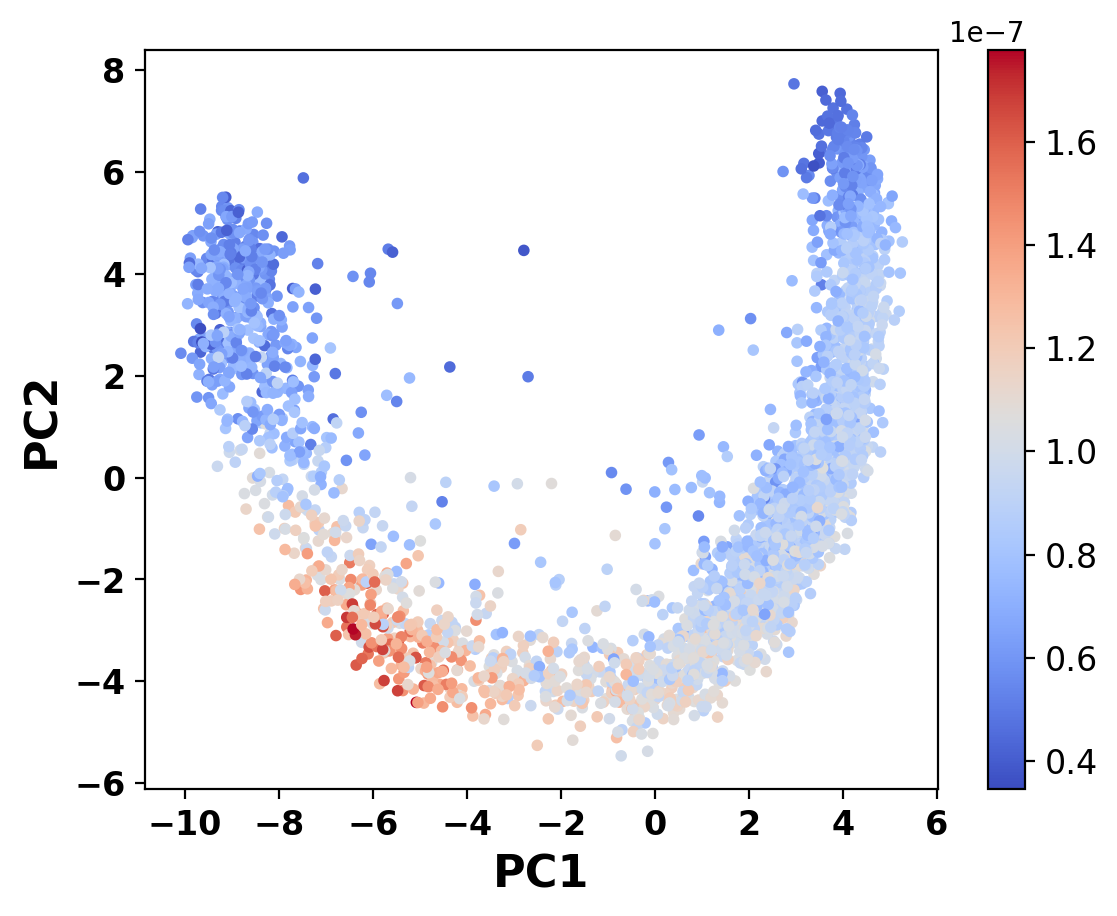

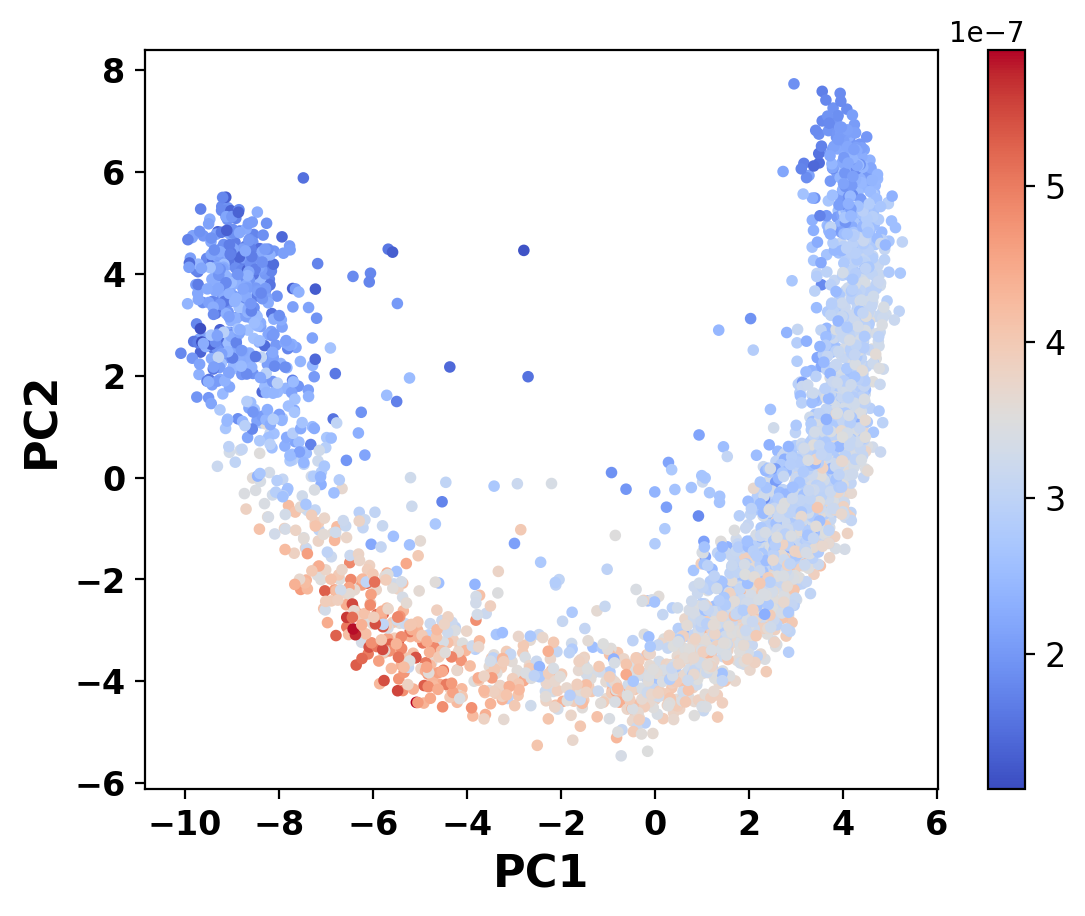

In [16]:
plt.scatter(-adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=10,c=J_ori_mean,cmap=plt.cm.coolwarm)
plt.xlabel('PC1',fontsize=16,fontweight='bold')
plt.ylabel('PC2',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=12)
plt.savefig(result_path+'DG_abs_mean_J.png',dpi=300)
plt.show()

plt.scatter(-adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=10,c=J_ori_std,cmap=plt.cm.coolwarm)
plt.xlabel('PC1',fontsize=16,fontweight='bold')
plt.ylabel('PC2',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=12)
plt.savefig(result_path+'DG_std_J.png',dpi=300)
plt.show()